# Hands On: Seleksi Fitur

Seringkali Anda akan memiliki ratusan atau ribuan fitur setelah berbagai penyandian dan pembuatan fitur. Hal ini dapat menyebabkan dua masalah. 

Pertama, semakin banyak fitur yang Anda miliki, semakin besar kemungkinan Anda menyesuaikan diri dengan set pelatihan dan validasi. Ini akan menyebabkan model Anda berkinerja lebih buruk dalam menggeneralisasi ke data baru.

Kedua, semakin banyak fitur yang Anda miliki, semakin lama waktu yang dibutuhkan untuk melatih model Anda dan mengoptimalkan hyperparameter. Selain itu, saat membuat produk yang menghadap pengguna, Anda harus membuat inferensi secepat mungkin. Menggunakan lebih sedikit fitur dapat mempercepat inferensi dengan mengorbankan kinerja prediktif.

Untuk membantu mengatasi masalah ini, Anda sebaiknya menggunakan teknik pemilihan fitur untuk mempertahankan fitur yang paling informatif untuk model Anda.


Seleksi fitur (feature selection) adalah proses memilih feature yang tepat untuk melatih model ML. 

Untuk melakukan feature selection, kita perlu memahami hubungan antara variables.
Hubungan antar dua random variables disebut correlation dan dapat dihitung dengan menggunakan correlation coefficient.

Range nilai correlation coeficient adalah:

Positif maks +1, korelasi positif, artinya kedua variable akan bergerak searah.
Negatif maks -1, korelasi negatif, artinya kedua variable akan bergerak berlawanan.
Nol, menunjukan antara kedua variable tidak ada correlation.
Teknik perhitungan correlation cukup banyak, berikut yang umum digunakan: Pearson, Kendall dan Spearman.

A. Pearson
* Paling umum digunakan.
* Digunakan untuk numerical data.
* Tidak bisa digunakan untuk ordinal data.
* Mengukur linear data dengan asumsi data terdistribusi normal.

B. Kendall
* Rank correlation measure.
* Dapat digunakan untuk numerical dan ordinal data, namun tidak untuk nominal data.
* Tidak diperlukan linear relationship antar variable.
* Digunakan untuk mengukur kemiripan ranked ordering data.
* Untuk kondisi normal lebih baik menggunakan Kendall dibandingkan Spearman.

C. Spearman
* Rank correlation measure
* Dapat digunakan untuk numerical dan ordinal data, namun tidak untuk nominal data.
* Tidak diperlukan linear relationship antar variable.
* Monotonic relationship

Ada beberapa metoda feature selection yang umum digunakan, yaitu Filter, Embedded dan Wrapper.

**Filter Method**
Umumnya digunakan pada tahap preprocessing. Pemilihan features tidak tergantung kepada algoritma ML yang akan digunakan . Features dipilih berdasarkan score test statistik kolerasi.

**Embedded Method**
Feature dipilih saat proses model training. Menggunakan learning algorithm untuk melakukan variable selection dan feature selection and classification secara simultan. Harus memilih algoritma machine learning yang sesuai.

**Wrapper Method**
Menggunakan subset of features untuk melatih model. Berdasarkan hasil yang dihasilkan dari model sebelumnya, kita tentukan untuk menambah atau membuang features dari subset. Kelemahannya membutuhkan resource besar dalam melakukan komputasi.

Ada jenis seleksi fitur lainnya, seperti dalam slide modul 8 ini, diantaranya:
1. Seleksi Univariat (Univariate Selection)
2. Pentingnya Fitur (Feature Importance)
3. Matriks Korelasi (Correlation Matrix) dengan Heatmap

Teknik pemilihan fitur yang perlu kita ketahui, untuk mendapatkan performa terbaik dari model Anda.

1. SelectKBest
2. Regresi linier
3. Random Forest
4. XGBoost
5. Penghapusan Fitur Rekursif
6. Boruta

### Berikut ini adalah sebagian kecil dari metode/teknik dalam Seleksi Fitur

#### Sumber dataset: 
---

https://www.kaggle.com/iabhishekofficial/mobile-price-classification#train.csv


#### Deskripsi variabel dari dataset:

* battery_power: Total energy a battery can store in one time measured in mAh
* blue: Has Bluetooth or not
* clock_speed: the speed at which microprocessor executes instructions
* dual_sim: Has dual sim support or not
* fc: Front Camera megapixels
* four_g: Has 4G or not
* int_memory: Internal Memory in Gigabytes
* m_dep: Mobile Depth in cm
* mobile_wt: Weight of mobile phone
* n_cores: Number of cores of the processor
* pc: Primary Camera megapixels
* px_height: Pixel Resolution Height
* px_width: Pixel Resolution Width
* ram: Random Access Memory in MegaBytes
* sc_h: Screen Height of mobile in cm
* sc_w: Screen Width of mobile in cm
* talk_time: the longest time that a single battery charge will last when you are
* three_g: Has 3G or not
* touch_screen: Has touch screen or not
* wifi: Has wifi or not
* price_range: This is the target variable with a value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost).




### 1. Seleksi Unvariate
---
Metode paling sederhana dan tercepat didasarkan pada uji statistik univariat. Untuk setiap fitur, ukur seberapa kuat target bergantung pada fitur menggunakan uji statistik seperti  χ2 (chi-square) or ANOVA.

Uji statistik dapat digunakan untuk memilih fitur-fitur tersebut yang memiliki relasi paling kuat dengan variabel output/target.
Library scikit-learn menyediakan class *SelectKBest* yang digunakan untuk serangkaian uji statistik berbeda untuk memilih angka spesifik dari fitur. Berikut ini adalah uji statistik chi-square utk fitur non-negatif untuk memilih 10 fitur terbaik dari dataset *Mobile Price Range Prediction*.

In [2]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

data = pd.read_csv("train.csv")

X = data.iloc[:,0:20]  #independent colums
y = data.iloc[:,-1]    # target colum i.e price range

# apply SelectKBest class to extract

bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

#concat two dataframes for better visualization 

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

            Specs          Score
13            ram  931267.519053
11      px_height   17363.569536
0   battery_power   14129.866576
12       px_width    9810.586750
8       mobile_wt      95.972863
6      int_memory      89.839124
15           sc_w      16.480319
16      talk_time      13.236400
4              fc      10.135166
14           sc_h       9.614878


### 2. Feature Importance
---
*Feature importance* mengacu pada kelas teknik untuk menetapkan skor ke fitur input ke model prediktif yang menunjukkan *importance* relatif dari setiap fitur saat membuat prediksi.

Skor *Feature importance* dapat dihitung untuk masalah yang melibatkan prediksi nilai numerik, yang disebut regresi, dan masalah yang melibatkan prediksi label kelas, yang disebut klasifikasi.

Skor berguna dan dapat digunakan dalam berbagai situasi dalam masalah pemodelan prediktif, seperti:

* Lebih memahami data.
* Lebih memahami model.
* Mengurangi jumlah fitur input.
* memberi  skor untuk setiap fitur data, semakin tinggi skor semakin penting atau relevan fitur tersebut terhadap variabel output

inbuilt yang dilengkapi dengan Pengklasifikasi Berbasis Pohon (Tree Based Classifier), kami akan menggunakan Pengklasifikasi Pohon Ekstra untuk mengekstraksi 10 fitur teratas untuk kumpulan data

[0.06310586 0.01917571 0.03446897 0.01973743 0.03240444 0.01771457
 0.03472218 0.03376637 0.03595849 0.03333071 0.0337358  0.04654512
 0.04888457 0.39014836 0.03428311 0.03496229 0.03558402 0.01445884
 0.01773747 0.01927568]


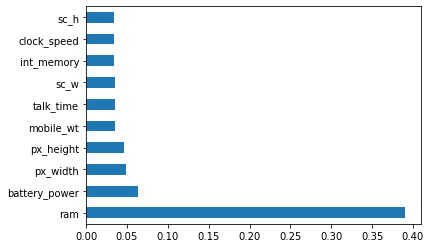

In [3]:
import pandas as pd
import numpy as np

data = pd.read_csv("train.csv")
X = data.iloc[:,0:20]  #independent columns
y = data.iloc[:,-1]    #target column i.e price range

from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)

print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

### 3. Matriks Korelasi dengan Heatmap
---

* Korelasi menyatakan bagaimana fitur terkait satu sama lain atau variabel target.
* Korelasi bisa positif (kenaikan satu nilai fitur meningkatkan nilai variabel target) atau negatif (kenaikan satu nilai fitur menurunkan nilai variabel target)
* Heatmap memudahkan untuk mengidentifikasi fitur mana yang paling terkait dengan variabel target, kami akan memplot peta panas fitur yang berkorelasi menggunakan seaborn library


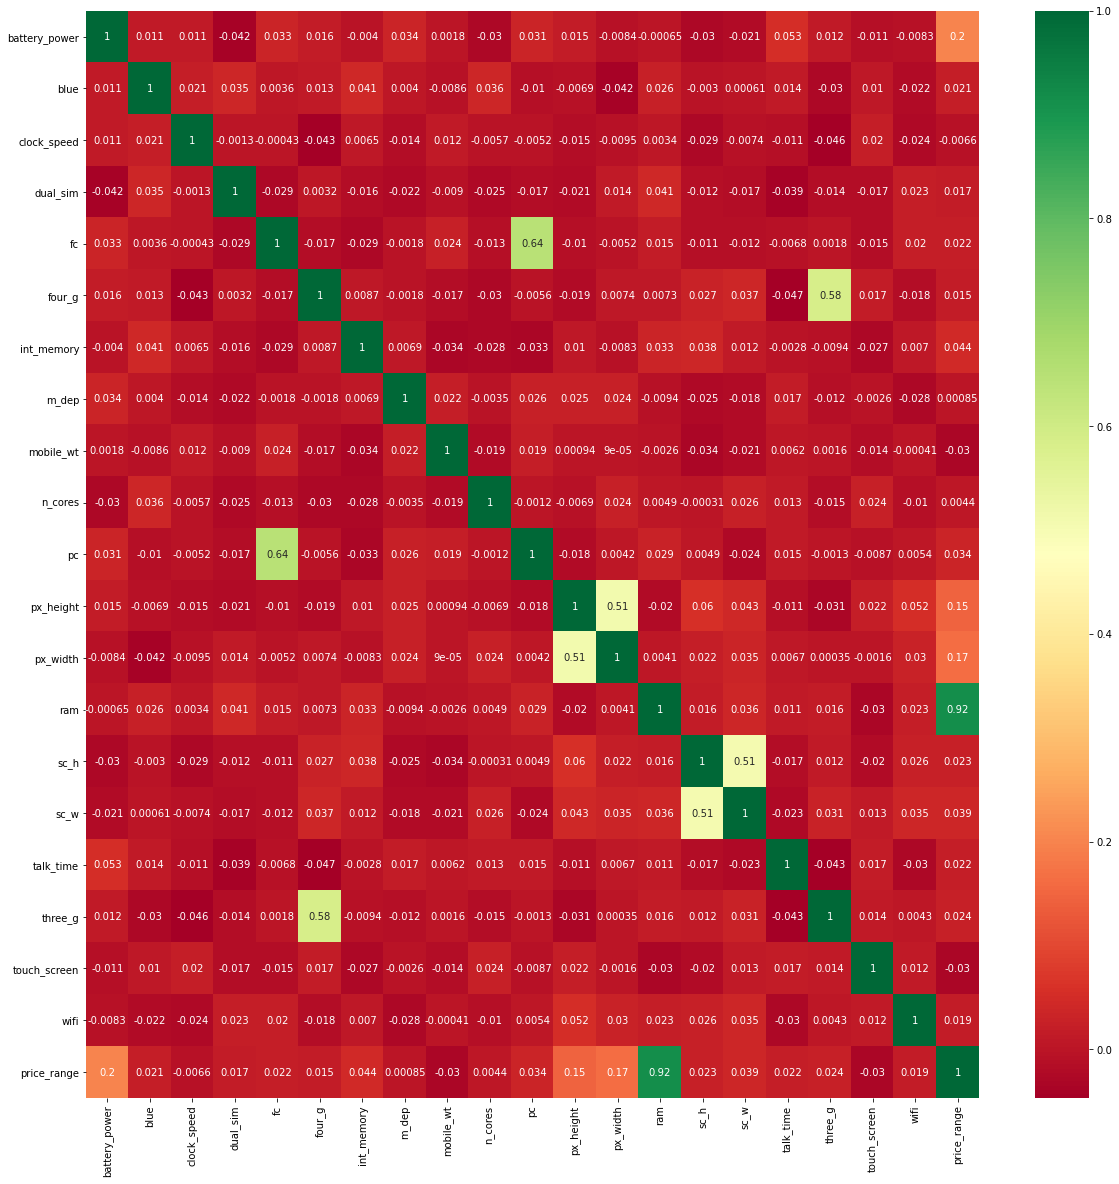

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns

data = pd.read_csv("train.csv")

X = data.iloc[:,0:20]  #independent columns
y = data.iloc[:,-1]    #target column i.e price range

#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))

#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

### Matriks Korelasi dengan Heatmap (lanjutan)
---


* lihat pada baris terakhir yaitu price range, korelasi antara price range dengan fitur lain dimana ada relasi kuat dengan variabel  ram dan diikuti oleh var battery power ,  px height and px width.
* sedangkan utk var clock_speed dan n_cores berkorelasi lemah dengan price range
